<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/Kaggle%2C%20%EB%8D%B0%EC%9D%B4%EC%BD%98/boston_0718.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

# 데이터 전처리

In [41]:
import pandas as pd
import numpy as np
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [43]:
# 불필요한 데이터 제거
train.drop(['Street','Alley','Utilities','Condition2','RoofMatl','BsmtFinType2',
            'BsmtFinSF2','Heating','LowQualFinSF','WoodDeckSF','OpenPorchSF',
            'PoolArea','PoolQC','MiscFeature','MiscVal','MoSold','YrSold'],
            axis='columns', inplace=True)

test.drop(['Street','Alley','Utilities','Condition2','RoofMatl','BsmtFinType2',
           'BsmtFinSF2','Heating','LowQualFinSF','WoodDeckSF','OpenPorchSF',
           'PoolArea','PoolQC','MiscFeature','MiscVal','MoSold','YrSold'],
            axis='columns', inplace=True)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,EnclosedPorch,Porch_3Ssn,ScreenPorch,Fence,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,...,TA,TA,Y,0,0,0,NaN,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,...,TA,TA,Y,0,0,0,NaN,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,...,TA,TA,Y,0,0,0,NaN,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,...,TA,TA,Y,272,0,0,NaN,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,...,TA,TA,Y,0,0,0,NaN,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  Exterior

## 타겟 변수 확인

<ipython-input-6-e5887825c6ba>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], fit=norm, ax=ax1)
<ipython-input-6-e5887825c6ba>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train['SalePrice']), fit=norm, ax=ax2)


<Axes: xlabel='SalePrice', ylabel='Density'>

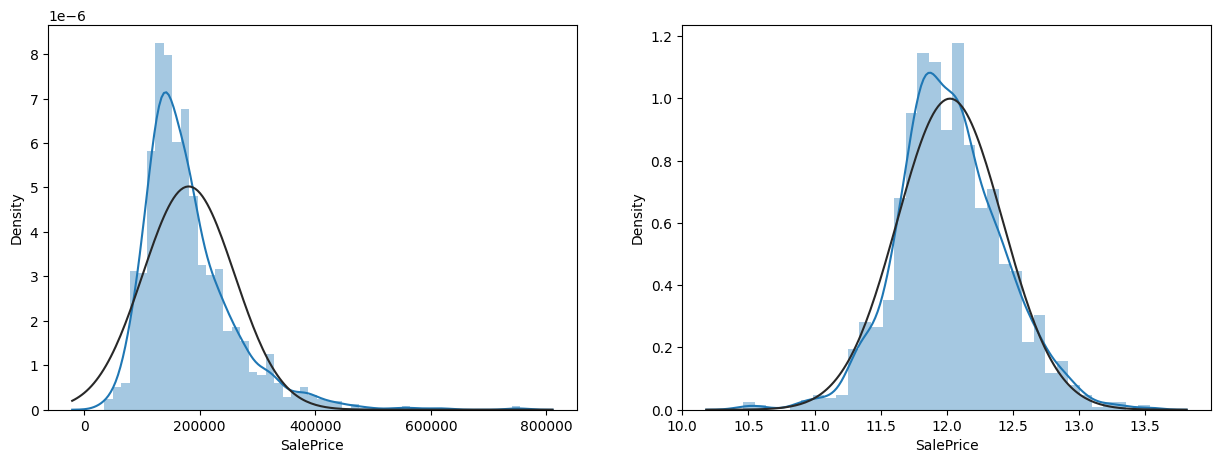

In [6]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(15, 5)
sns.distplot(train['SalePrice'], fit=norm, ax=ax1)
sns.distplot(np.log(train['SalePrice']), fit=norm, ax=ax2)

## 파생 변수 만들기

### 외부 컨디션

In [7]:
# 외부 컨디션
Condition_var = ['OverallQual','OverallCond','ExterQual','ExterCond']
Condition_Ex = train[Condition_var]

Condition_Ex = Condition_Ex.replace(to_replace='Ex',value = 5)
Condition_Ex = Condition_Ex.replace(to_replace='Gd',value = 4)
Condition_Ex = Condition_Ex.replace(to_replace='TA',value = 3)
Condition_Ex = Condition_Ex.replace(to_replace='Fa',value = 2)
Condition_Ex = Condition_Ex.replace(to_replace='Po',value = 1)
Condition_Ex = Condition_Ex.replace(to_replace='None',value = 0)
Condition_Ex = Condition_Ex.replace(to_replace='',value = 0)
Condition_Ex = Condition_Ex.replace(to_replace='NA',value = 0)

train['New_var1'] = Condition_Ex['OverallQual'] + Condition_Ex['OverallCond']\
                  + Condition_Ex['ExterQual'] + Condition_Ex['ExterCond']

In [8]:
Condition_var = ['OverallQual','OverallCond','ExterQual','ExterCond']
Condition_Ex = test[Condition_var]

Condition_Ex = Condition_Ex.replace(to_replace='Ex',value = 5)
Condition_Ex = Condition_Ex.replace(to_replace='Gd',value = 4)
Condition_Ex = Condition_Ex.replace(to_replace='TA',value = 3)
Condition_Ex = Condition_Ex.replace(to_replace='Fa',value = 2)
Condition_Ex = Condition_Ex.replace(to_replace='Po',value = 1)
Condition_Ex = Condition_Ex.replace(to_replace='None',value = 0)
Condition_Ex = Condition_Ex.replace(to_replace='',value = 0)
Condition_Ex = Condition_Ex.replace(to_replace='NA',value = 0)

test['New_var1'] = Condition_Ex['OverallQual'] + Condition_Ex['OverallCond']\
                 + Condition_Ex['ExterQual'] + Condition_Ex['ExterCond']

### 내부 면적

In [9]:
# 내부 면적
train = train.drop(train[(train['TotalBsmtSF'] > 4000) |
                         (train['FlrSF_1st'] > 300000) |
                         (train['FlrSF_2nd'] > 1700) |
                         (train['GrLivArea'] > 4000)].index)

train['New_var2'] = train['TotalBsmtSF'] + train['FlrSF_1st']\
                  + train['FlrSF_2nd'] + train['GrLivArea']

test['New_var2'] = test['TotalBsmtSF'] + test['FlrSF_1st']\
                 + test['FlrSF_2nd'] + test['GrLivArea']

### 욕실 개수

In [10]:
# 욕실 개수
train['New_var3'] = train['BsmtFullBath'] + train['BsmtHalfBath']/2\
                  + train['FullBath'] + train['HalfBath']/2

test['New_var3'] = test['BsmtFullBath'] + test['BsmtHalfBath']/2\
                 + test['FullBath'] + test['HalfBath']/2

### 지하실 상태

In [11]:
# 지하실 상태
Under_Cond_var1 = ['BsmtQual','BsmtCond']
Under_Cond_Ex1 = train[Under_Cond_var1]

Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Ex',value = 5)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Gd',value = 4)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='TA',value = 3)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Fa',value = 2)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Po',value = 1)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='None',value = 0)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='',value = 0)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='NA',value = 0)

Under_Cond_var2 = ['BsmtExposure','BsmtFinType1']
Under_Cond_Ex2 = train[Under_Cond_var2]

Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Gd',value = 4)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Av',value = 3)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Mn',value = 2)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='No',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='None',value = 0)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='',value = 0)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='NA',value = 0)

Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='GLQ',value = 4)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='ALQ',value = 3)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='BLQ',value = 2)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Rec',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='LwQ',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Unf',value = 1)

train['New_var4'] = Under_Cond_Ex1['BsmtQual'] + Under_Cond_Ex1['BsmtCond']\
                  + Under_Cond_Ex2['BsmtExposure'] + Under_Cond_Ex2['BsmtFinType1']

In [12]:
Under_Cond_var1 = ['BsmtQual','BsmtCond']
Under_Cond_Ex1 = test[Under_Cond_var1]

Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Ex',value = 5)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Gd',value = 4)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='TA',value = 3)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Fa',value = 2)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Po',value = 1)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='None',value = 0)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='',value = 0)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='NA',value = 0)

Under_Cond_var2 = ['BsmtExposure','BsmtFinType1']
Under_Cond_Ex2 = test[Under_Cond_var2]

Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Gd',value = 4)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Av',value = 3)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Mn',value = 2)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='No',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='None',value = 0)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='',value = 0)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='NA',value = 0)

Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='GLQ',value = 4)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='ALQ',value = 3)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='BLQ',value = 2)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Rec',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='LwQ',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Unf',value = 1)

test['New_var4'] = Under_Cond_Ex1['BsmtQual'] + Under_Cond_Ex1['BsmtCond']\
                 + Under_Cond_Ex2['BsmtExposure'] + Under_Cond_Ex2['BsmtFinType1']

### 부지 평탄도

In [13]:
# 부지 평탄도
Land_var = ['LotShape','LandContour']
Land_Ex = train[Land_var]

Land_Ex = Land_Ex.replace(to_replace='IR1',value = 0)
Land_Ex = Land_Ex.replace(to_replace='IR2',value = 0)
Land_Ex = Land_Ex.replace(to_replace='IR3',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Reg',value = 1)

Land_Ex = Land_Ex.replace(to_replace='None',value = 0)
Land_Ex = Land_Ex.replace(to_replace='',value = 0)
Land_Ex = Land_Ex.replace(to_replace='NA',value = 0)

Land_Ex = Land_Ex.replace(to_replace='Bnk',value = 0)
Land_Ex = Land_Ex.replace(to_replace='HLS',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Low',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Lvl',value = 1)

train['New_var5'] = Land_Ex['LotShape'] + Land_Ex['LandContour']

In [14]:
Land_var = ['LotShape','LandContour']
Land_Ex = test[Land_var]

Land_Ex = Land_Ex.replace(to_replace='IR1',value = 0)
Land_Ex = Land_Ex.replace(to_replace='IR2',value = 0)
Land_Ex = Land_Ex.replace(to_replace='IR3',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Reg',value = 1)

Land_Ex = Land_Ex.replace(to_replace='None',value = 0)
Land_Ex = Land_Ex.replace(to_replace='',value = 0)
Land_Ex = Land_Ex.replace(to_replace='NA',value = 0)

Land_Ex = Land_Ex.replace(to_replace='Bnk',value = 0)
Land_Ex = Land_Ex.replace(to_replace='HLS',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Low',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Lvl',value = 1)

test['New_var5'] = Land_Ex['LotShape'] + Land_Ex['LandContour']

### 차고 상태

In [15]:
# 차고 상태
Garage_var = ['GarageFinish','GarageQual','GarageCond']
Garage_Ex = train[Garage_var]

Garage_Ex = Garage_Ex.replace(to_replace='Ex',value = 5)
Garage_Ex = Garage_Ex.replace(to_replace='Gd',value = 4)
Garage_Ex = Garage_Ex.replace(to_replace='TA',value = 3)
Garage_Ex = Garage_Ex.replace(to_replace='Fa',value = 2)
Garage_Ex = Garage_Ex.replace(to_replace='Po',value = 1)
Garage_Ex = Garage_Ex.replace(to_replace='None',value = 0)
Garage_Ex = Garage_Ex.replace(to_replace='',value = 0)
Garage_Ex = Garage_Ex.replace(to_replace='NA',value = 0)

Garage_Ex = Garage_Ex.replace(to_replace='Fin',value = 3)
Garage_Ex = Garage_Ex.replace(to_replace='RFn',value = 2)
Garage_Ex = Garage_Ex.replace(to_replace='Unf',value = 1)

train['New_var6'] = Garage_Ex['GarageFinish'] + Garage_Ex['GarageQual'] + Garage_Ex['GarageCond']

In [16]:
Garage_var = ['GarageFinish','GarageQual','GarageCond']
Garage_Ex = test[Garage_var]

Garage_Ex = Garage_Ex.replace(to_replace='Ex',value = 5)
Garage_Ex = Garage_Ex.replace(to_replace='Gd',value = 4)
Garage_Ex = Garage_Ex.replace(to_replace='TA',value = 3)
Garage_Ex = Garage_Ex.replace(to_replace='Fa',value = 2)
Garage_Ex = Garage_Ex.replace(to_replace='Po',value = 1)
Garage_Ex = Garage_Ex.replace(to_replace='None',value = 0)
Garage_Ex = Garage_Ex.replace(to_replace='',value = 0)
Garage_Ex = Garage_Ex.replace(to_replace='NA',value = 0)

Garage_Ex = Garage_Ex.replace(to_replace='Fin',value = 3)
Garage_Ex = Garage_Ex.replace(to_replace='RFn',value = 2)
Garage_Ex = Garage_Ex.replace(to_replace='Unf',value = 1)

test['New_var6'] = Garage_Ex['GarageFinish'] + Garage_Ex['GarageQual'] + Garage_Ex['GarageCond']

### 건축 연도

In [17]:
# 건축 연도
train['New_var7'] = ((2020 - train['YearBuilt']) + (2020 - train['YearRemodAdd'])) / 2
test['New_var7'] = ((2020 - test['YearBuilt']) + (2020 - test['YearRemodAdd'])) / 2

## 추가 변수 생성

### 침실수 + 주방수

In [47]:
train['BedroomAbvGr'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [46]:
train['KitchenAbvGr'].value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [18]:
train['New_var8'] = train['BedroomAbvGr'] + train['KitchenAbvGr']/2
test['New_var8'] = test['BedroomAbvGr'] + test['KitchenAbvGr']/2

### 주방퀄리티

In [19]:
train['KitchenQual'].unique()
# Ex = Excellent, Gd = Good , TA = Typical, Fa = Fair, Po = Poor

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [20]:
Kitchen_var = ['KitchenQual']
Kitchen_Ex = train[Kitchen_var]

Kitchen_Ex = Kitchen_Ex.replace(to_replace='Ex',value = 5)
Kitchen_Ex = Kitchen_Ex.replace(to_replace='Gd',value = 4)
Kitchen_Ex = Kitchen_Ex.replace(to_replace='TA',value = 3)
Kitchen_Ex = Kitchen_Ex.replace(to_replace='Fa',value = 2)

train['New_var9'] = Kitchen_Ex['KitchenQual']

In [21]:
Kitchen_var = ['KitchenQual']
Kitchen_Ex = test[Kitchen_var]

Kitchen_Ex = Kitchen_Ex.replace(to_replace='Ex',value = 5)
Kitchen_Ex = Kitchen_Ex.replace(to_replace='Gd',value = 4)
Kitchen_Ex = Kitchen_Ex.replace(to_replace='TA',value = 3)
Kitchen_Ex = Kitchen_Ex.replace(to_replace='Fa',value = 2)

test['New_var9'] = Kitchen_Ex['KitchenQual']

### KNN - 직면도로의 폭

In [48]:
train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [23]:
# KNNImputer 객체 생성
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV

# 데이터 예시 (X는 특성 행렬, y는 타깃 벡터)
X = train.drop(['LotFrontage'], axis=1)  # 결측치가 포함된 특성 행렬
y = train['LotFrontage']  # 타깃 벡터

# 결측치를 대체하기 위한 KNNImputer 객체 생성
imputer = KNNImputer()

# 대체하고자 하는 n_neighbor 후보들
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# LotFrontage 변수에 대한 결측치 대체
train['LotFrontage'] = imputer.fit_transform(train[['LotFrontage']])
test['LotFrontage'] = imputer.fit_transform(test[['LotFrontage']])

### Missing 및 NA값 처리

In [24]:
# Train 파생변수 관련 변수 제외
train.drop(['OverallQual','OverallCond','ExterQual','ExterCond',
            'TotalBsmtSF','FlrSF_1st','FlrSF_2nd','GrLivArea',
            'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
            'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
            'LotShape','LandContour','BedroomAbvGr', 'KitchenAbvGr',
            'KitchenQual','GarageFinish','GarageQual','GarageCond',
            'YearBuilt','YearRemodAdd','Electrical'], axis = 'columns', inplace=True)

# Test 파생변수 관련 변수 제외
test.drop(['OverallQual','OverallCond','ExterQual','ExterCond',
           'TotalBsmtSF','FlrSF_1st','FlrSF_2nd','GrLivArea',
           'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
           'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
           'LotShape','LandContour','BedroomAbvGr', 'KitchenAbvGr',
           'KitchenQual','GarageFinish','GarageQual','GarageCond',
           'YearBuilt','YearRemodAdd','Electrical'], axis = 'columns', inplace=True)

In [25]:
for col in ('MasVnrType','FireplaceQu','GarageType','Fence'):
    train[col] = train[col].fillna('None')

for col in ('New_var1','New_var2','New_var3','New_var4','New_var5',
            'New_var6','New_var7','New_var8', 'New_var9',
            'LotFrontage','MasVnrArea','GarageYrBlt', 'BsmtFinSF1',
            'GarageCars', 'GarageArea', 'BsmtUnfSF'):
    train[col] = train[col].fillna(0)

for col in ('MSZoning', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional'):
    train[col] = train[col].fillna(test[col].mode()[0])
#------------------------------------------------------------------------
for col in ('MasVnrType','FireplaceQu','GarageType','Fence'):
    test[col] = test[col].fillna('None')

for col in ('New_var1','New_var2','New_var3','New_var4','New_var5',
            'New_var6','New_var7','New_var8', 'New_var9',
            'LotFrontage','MasVnrArea','GarageYrBlt', 'BsmtFinSF1',
            'GarageCars', 'GarageArea', 'BsmtUnfSF'):
    test[col] = test[col].fillna(0)

for col in ('MSZoning', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional'):
    test[col] = test[col].fillna(test[col].mode()[0])

### 범주형 변수 더미화

In [26]:
dummy_list = list(train.select_dtypes(include =['object']).columns)
dummies = pd.get_dummies(train[dummy_list], prefix = dummy_list)
train.drop(dummy_list, axis = 1, inplace = True)
X = pd.concat([train, dummies], axis = 1)

dummy_list = list(test.select_dtypes(include =['object']).columns)
dummies = pd.get_dummies(test[dummy_list], prefix = dummy_list)
test.drop(dummy_list, axis = 1, inplace = True)
X = pd.concat([test, dummies], axis = 1)

# 모델 구축

In [27]:
data = train[list(test)]
target = np.log(train['SalePrice'])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1454 non-null   int64  
 1   MSSubClass     1454 non-null   int64  
 2   LotFrontage    1454 non-null   float64
 3   LotArea        1454 non-null   int64  
 4   MasVnrArea     1454 non-null   float64
 5   BsmtFinSF1     1454 non-null   int64  
 6   BsmtUnfSF      1454 non-null   int64  
 7   TotRmsAbvGrd   1454 non-null   int64  
 8   Fireplaces     1454 non-null   int64  
 9   GarageYrBlt    1454 non-null   float64
 10  GarageCars     1454 non-null   int64  
 11  GarageArea     1454 non-null   int64  
 12  EnclosedPorch  1454 non-null   int64  
 13  Porch_3Ssn     1454 non-null   int64  
 14  ScreenPorch    1454 non-null   int64  
 15  New_var1       1454 non-null   int64  
 16  New_var2       1454 non-null   int64  
 17  New_var3       1454 non-null   float64
 18  New_var4

In [50]:
target.describe()

count    1454.000000
mean       12.020639
std         0.394540
min        10.460242
25%        11.774520
50%        12.001199
75%        12.271392
max        13.323927
Name: SalePrice, dtype: float64

### Lasso

In [29]:
from sklearn.linear_model import Lasso

Lasso = Lasso()
Lasso.fit(data, target)

predict = Lasso.predict(test)
predict = np.exp(predict)
result = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': predict
})
result.to_csv('result_Lasso.csv', index=False)

### GBoost

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

GBoost = GradientBoostingRegressor(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200
)
GBoost.fit(data, target)

predict = GBoost.predict(test)
predict = np.exp(predict)
result = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': predict
})
result.to_csv('result_GBoost.csv', index=False)

### XGBoost

In [31]:
from xgboost import XGBRegressor

XGB = XGBRegressor()
XGB.fit(data, target)

predict = XGB.predict(test)
predict = np.exp(predict)
result = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': predict
})
result.to_csv('result_XGB.csv', index=False)

### RandomForest

In [32]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(data, target)

predict = RF.predict(test)
predict = np.exp(predict)
result = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': predict
})
result.to_csv('result_RF.csv', index=False)

### SVM

In [33]:
from sklearn.svm import SVR

SVM = SVR()
SVM.fit(data, target)

predict = SVM.predict(test)
predict = np.exp(predict)
result = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': predict
})
result.to_csv('result_SVM.csv', index=False)

### LGBM

In [34]:
from lightgbm import LGBMRegressor

LGBM = LGBMRegressor()
LGBM.fit(data, target)

predict = LGBM.predict(test)
predict = np.exp(predict)
result = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': predict
})
result.to_csv('result_LGBM.csv', index=False)

### Elasticnet

In [35]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(data, target)

predict = elasticnet.predict(test)
predict = np.exp(predict)
result = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': predict
})

result.to_csv('result_ElasticNet.csv', index=False)

In [36]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
X = train.drop('SalePrice', axis=1).values
y = train['SalePrice'].values

In [38]:
# k-fold 교차 검증을 위한 객체 생성
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 모델 선택 - 선형 회귀
model = LinearRegression()

# k-fold 교차 검증 수행
mse_scores = []  # 평균 제곱 오차(Mean Squared Error)를 저장할 리스트
r2_scores = []   # 결정 계수(R-squared)를 저장할 리스트

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# k-fold 교차 검증 결과 출력
print("Mean MSE:", np.mean(mse_scores))
print("Mean R-squared:", np.mean(r2_scores))

Mean MSE: 794890804.314531
Mean R-squared: 0.8603802072054633


In [39]:
# 그리드 서치를 위한 모델과 하이퍼파라미터 그리드 설정
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# 그리드 서치 객체 생성
grid_search = GridSearchCV(model, param_grid, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1)
# 그리드 서치 수행
grid_search.fit(X, y)

# 최적의 하이퍼파라미터와 결과 출력
print("Best Parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)  # 음수로 저장되므로 양수로 바꿔서 출력

# Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
# Best MSE: 589571697.3310046

<Axes: >

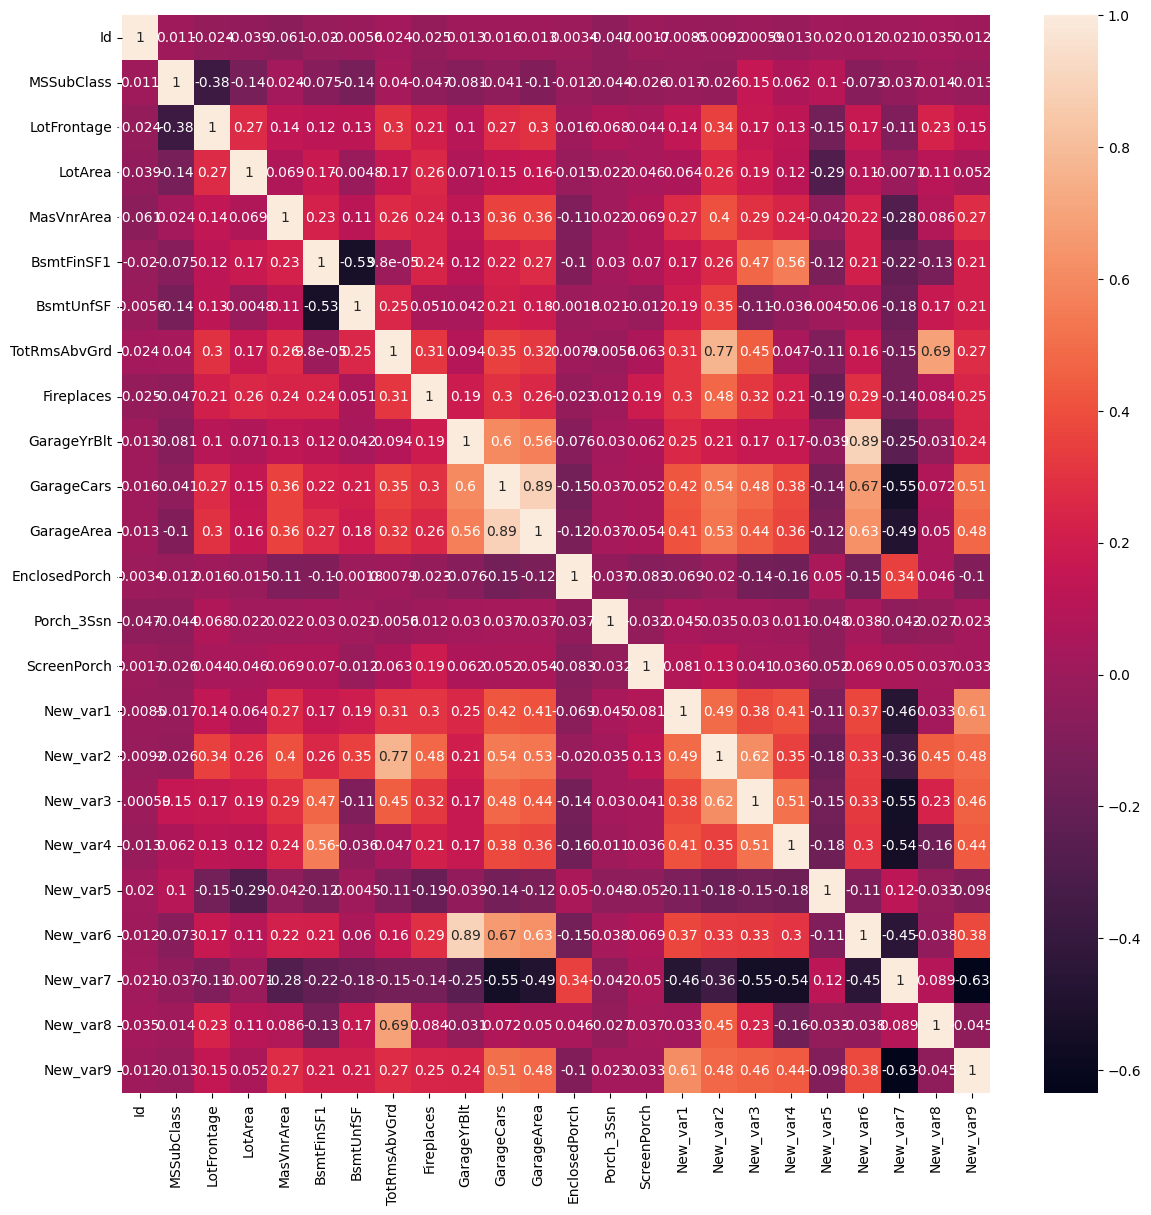

In [40]:
plt.figure(figsize=(14, 14))
sns.heatmap(data.corr(), annot=True)